In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [3]:
transform = transforms.Compose([transforms.ToTensor()])

In [4]:
trainset = datasets.MNIST('TRAIN_SET', download= True , train= True , transform=transform)
valset = datasets.MNIST('TEST_SET', download= True , train= False , transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle= True )
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle= True )

In [5]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

In [6]:
set_min, set_max = set(), set()
for i in range(len(images)):
    set_min.add(torch.min(images[i]).item())
    set_max.add(torch.max(images[i]).item())
print('Мінімальне значення пікселя: {}\nМаксимальне значення пікселя: {}'.format(min(set_min), max(set_max)))

Мінімальне значення пікселя: 0.0
Максимальне значення пікселя: 1.0


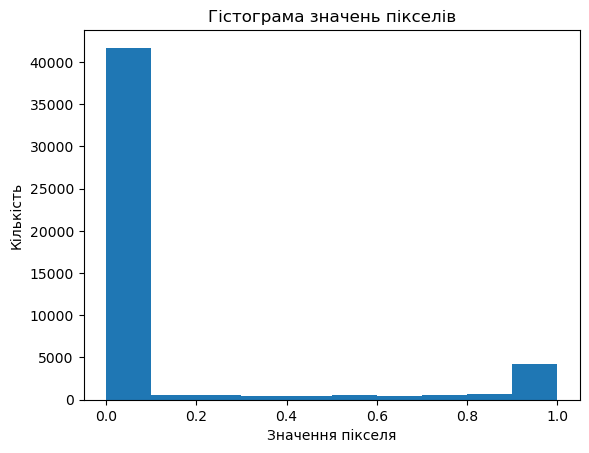

In [7]:
pixel_values = images.view(-1).numpy()

# Побудова гістограми
plt.hist(pixel_values, bins=10)
plt.title('Гістограма значень пікселів')
plt.xlabel('Значення пікселя')
plt.ylabel('Кількість')
plt.show()

In [8]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST('TRAIN_SET', download= True , train= True , transform=transform)
valset = datasets.MNIST('TEST_SET', download= True , train= False , transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle= True )
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle= True )

In [9]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

In [10]:
set_min, set_max = set(), set()
for i in range(len(images)):
    set_min.add(torch.min(images[i]).item())
    set_max.add(torch.max(images[i]).item())
print('Мінімальне значення пікселя: {}\nМаксимальне значення пікселя: {}'.format(min(set_min), max(set_max)))

Мінімальне значення пікселя: -1.0
Максимальне значення пікселя: 1.0


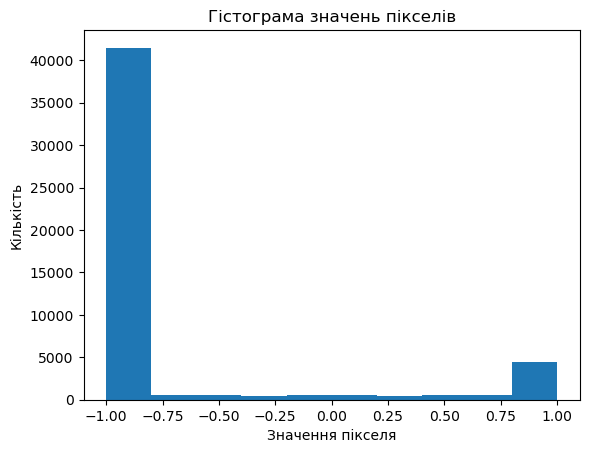

In [11]:
pixel_values = images.view(-1).numpy()

# Побудова гістограми
plt.hist(pixel_values, bins=10)
plt.title('Гістограма значень пікселів')
plt.xlabel('Значення пікселя')
plt.ylabel('Кількість')
plt.show()

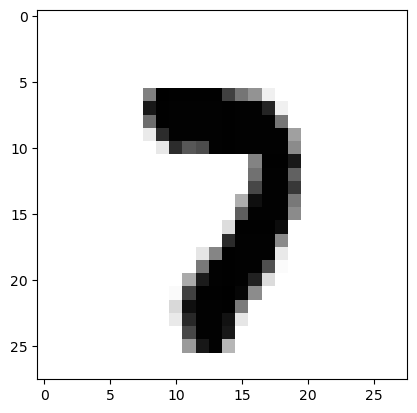

In [12]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')
plt.show()

In [13]:
input_size = 28 * 28
hidden_sizes = [392, 196, 98]
output_size = 10

model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),
    nn.BatchNorm1d(hidden_sizes[0]),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    nn.BatchNorm1d(hidden_sizes[1]),
    nn.ReLU(),
    nn.Dropout(0.25),
    nn.Linear(hidden_sizes[1], hidden_sizes[2]),
    nn.BatchNorm1d(hidden_sizes[2]),
    nn.ReLU(),
    nn.Dropout(0.25),
    nn.Linear(hidden_sizes[2], output_size),
    nn.LogSoftmax(dim=1)
)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=392, bias=True)
  (1): BatchNorm1d(392, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=392, out_features=196, bias=True)
  (5): BatchNorm1d(196, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): Dropout(p=0.25, inplace=False)
  (8): Linear(in_features=196, out_features=98, bias=True)
  (9): BatchNorm1d(98, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): Dropout(p=0.25, inplace=False)
  (12): Linear(in_features=98, out_features=10, bias=True)
  (13): LogSoftmax(dim=1)
)


Epoch 1 - Training loss: 0.5608428694339577
Epoch 1 - Training loss: 0.5608, Validation loss: 0.1724
Epoch 2 - Training loss: 0.15306949793502117
Epoch 2 - Training loss: 0.1531, Validation loss: 0.1139
Epoch 3 - Training loss: 0.10335313090220538
Epoch 3 - Training loss: 0.1034, Validation loss: 0.0933
Epoch 4 - Training loss: 0.07842566051792457
Epoch 4 - Training loss: 0.0784, Validation loss: 0.0791
Epoch 5 - Training loss: 0.06274644071164269
Epoch 5 - Training loss: 0.0627, Validation loss: 0.0781
Epoch 6 - Training loss: 0.0518401743710609
Epoch 6 - Training loss: 0.0518, Validation loss: 0.0799
Epoch 7 - Training loss: 0.04356577337336248
Epoch 7 - Training loss: 0.0436, Validation loss: 0.0690
Epoch 8 - Training loss: 0.035457756268535694
Epoch 8 - Training loss: 0.0355, Validation loss: 0.0662
Epoch 9 - Training loss: 0.030944774375927114
Epoch 9 - Training loss: 0.0309, Validation loss: 0.0637
Epoch 10 - Training loss: 0.026465599442512464
Epoch 10 - Training loss: 0.0265, V

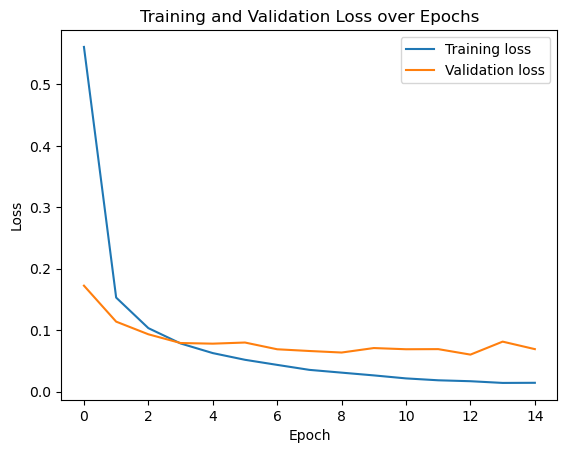

In [14]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time_start = time()
epochs = 15
train_losses = []
val_losses = []
time_start = time()

for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)
    print("Epoch {} - Training loss: {}".format(epoch+1, train_loss))

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for images, labels in valloader:
            images = images.view(images.shape[0], -1)
            output = model(images)
            loss = criterion(output, labels)
            val_loss += loss.item()
    
    val_loss /= len(valloader)
    val_losses.append(val_loss)
    print("Epoch {} - Training loss: {:.4f}, Validation loss: {:.4f}".format(epoch+1, train_loss, val_loss))

time_end = time()
print('Час виконання: ', (time_end - time_start) / 60, ' хв.')
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

True Label: 8, Predicted Digit: 8


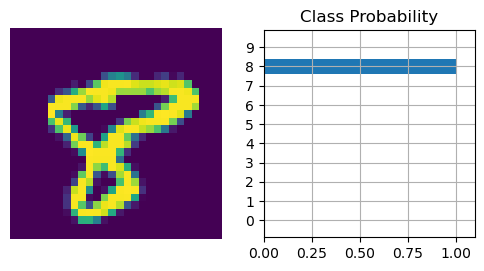

True Label: 8, Predicted Digit: 8


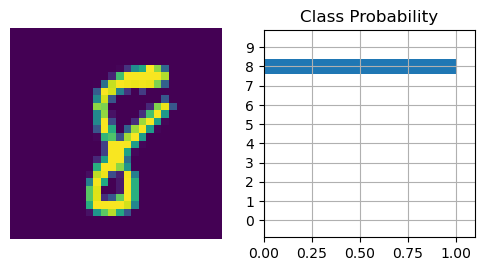

True Label: 1, Predicted Digit: 1


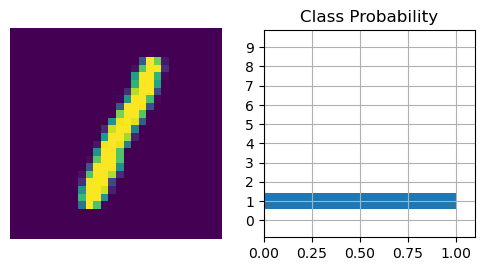

True Label: 7, Predicted Digit: 7


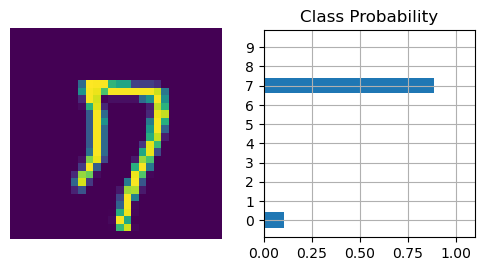

True Label: 4, Predicted Digit: 4


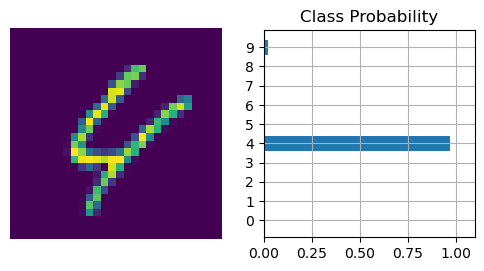

True Label: 7, Predicted Digit: 7


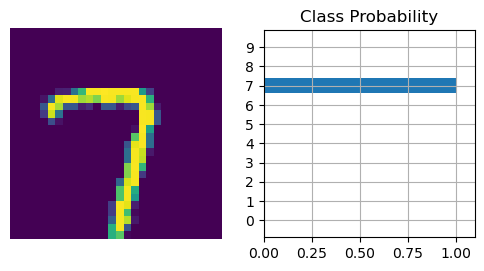

True Label: 2, Predicted Digit: 2


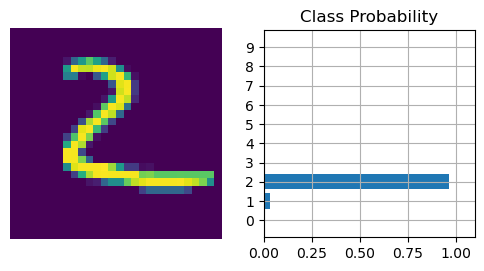

True Label: 0, Predicted Digit: 0


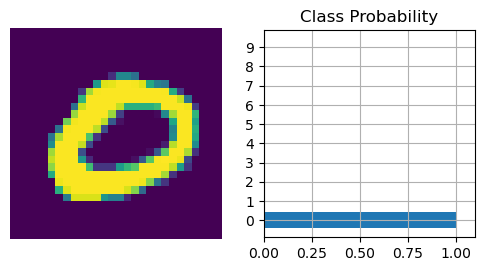

True Label: 4, Predicted Digit: 4


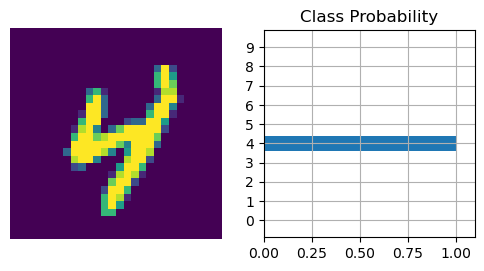

True Label: 1, Predicted Digit: 1


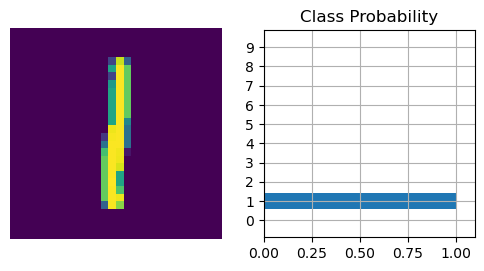

True Label: 5, Predicted Digit: 5


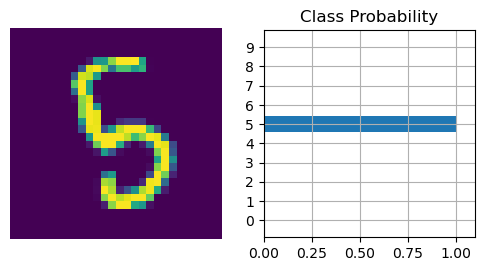

True Label: 5, Predicted Digit: 5


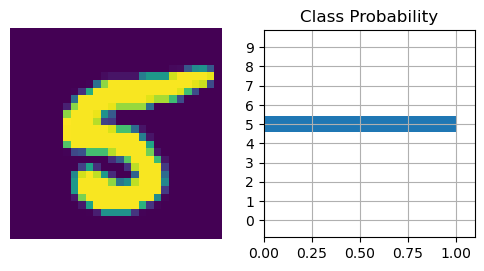

True Label: 3, Predicted Digit: 3


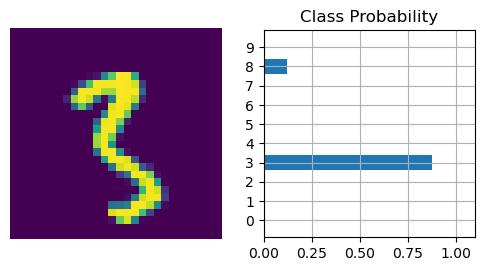

True Label: 8, Predicted Digit: 8


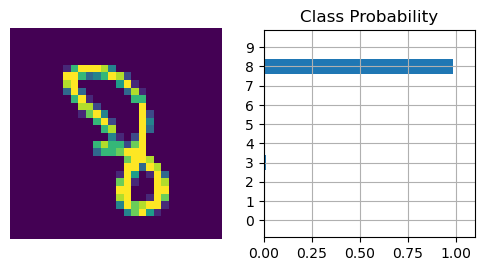

True Label: 9, Predicted Digit: 9


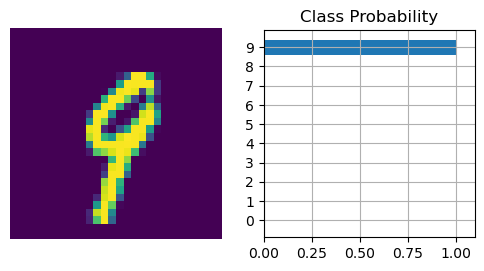

True Label: 7, Predicted Digit: 7


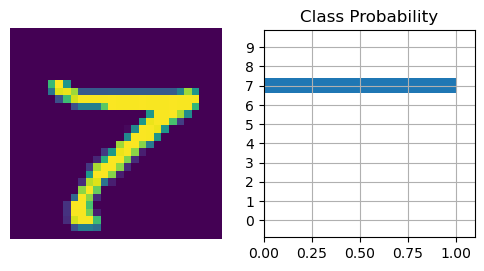

True Label: 7, Predicted Digit: 7


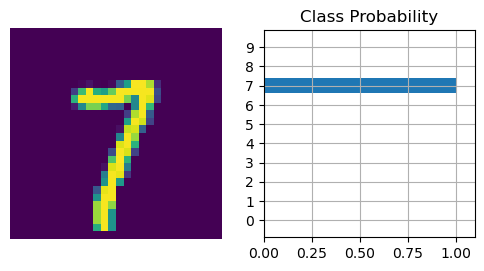

True Label: 8, Predicted Digit: 8


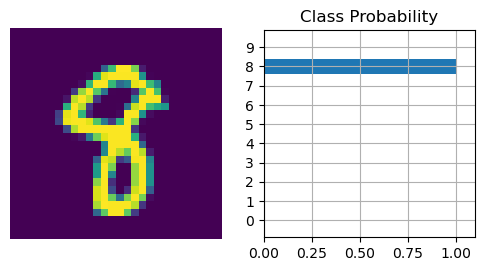

True Label: 2, Predicted Digit: 2


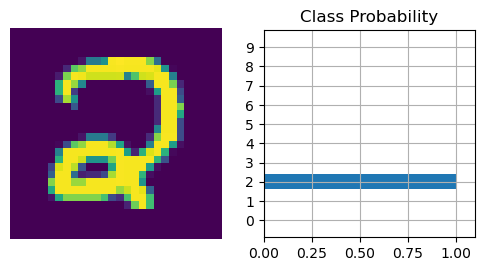

True Label: 3, Predicted Digit: 3


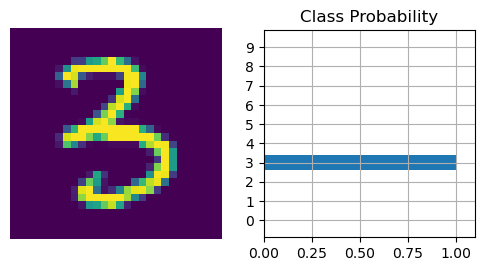

In [22]:
def view_classify(img, ps, label):
    
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.grid(True)

for i in range(20):
    images, labels = next(iter(valloader))
    img = images[0].view(1, 784)
    label = labels[0]
    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    print("True Label: {}, Predicted Digit: {}".format(label, probab.index(max(probab))))
    view_classify(img.view(1, 28, 28), ps, label)
    plt.show()


In [23]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9808
